In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DelhiHousePrice.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


About the data

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. 

It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# For Simple Linear Regression 
We are going to use 'Price' -> Target, 'Area' as the independent variable for SLR

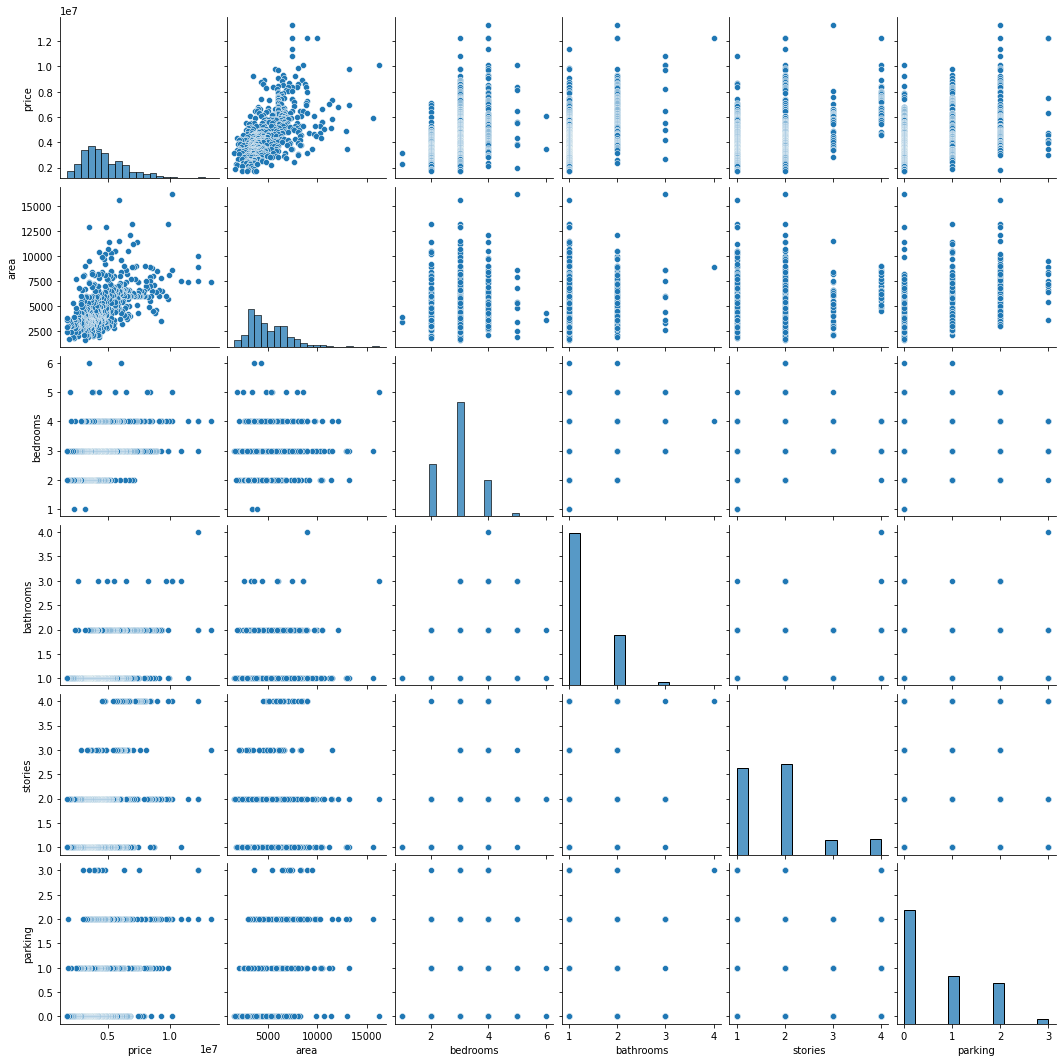

In [4]:
sns.pairplot(df)

c:\users\ayray\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

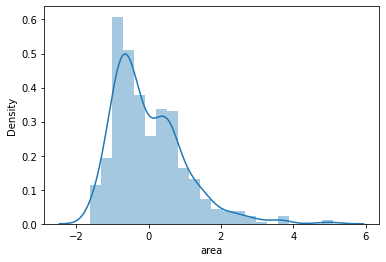

In [11]:
df["area"] = (df["area"]-df["area"].mean())/df["area"].std()
sns.distplot(df.area)

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.045766,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,1.755397,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,2.216196,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,1.082630,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,1.045766,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Note : Scaling target variable is usually redundant

In [16]:
# Outlier detection & treatment

OutlierRows = df[(df.area<-3) | (df.area>3)]
display(len(OutlierRows)/len(df)*100)

df_NoOutlier = df.drop(OutlierRows.index,axis=0)
df_NoOutlier.info()

1.2844036697247707

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             538 non-null    int64  
 1   area              538 non-null    float64
 2   bedrooms          538 non-null    int64  
 3   bathrooms         538 non-null    int64  
 4   stories           538 non-null    int64  
 5   mainroad          538 non-null    object 
 6   guestroom         538 non-null    object 
 7   basement          538 non-null    object 
 8   hotwaterheating   538 non-null    object 
 9   airconditioning   538 non-null    object 
 10  parking           538 non-null    int64  
 11  prefarea          538 non-null    object 
 12  furnishingstatus  538 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 58.8+ KB


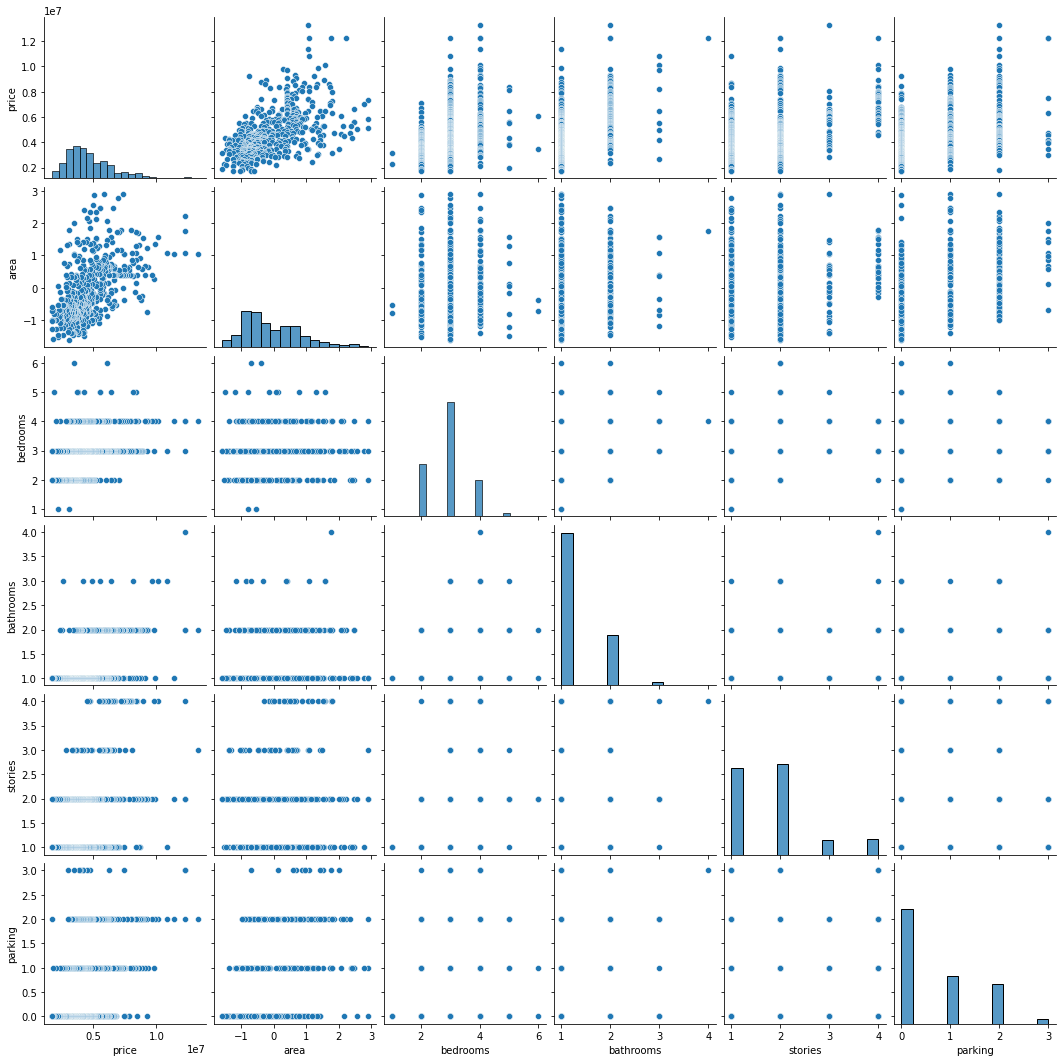

In [18]:
sns.pairplot(df_NoOutlier)

In [32]:
df_NoOutlier.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.045766,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,1.755397,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,2.216196,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,1.082630,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,1.045766,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
# Data Splitting

X = pd.DataFrame(df_NoOutlier["area"])
X["area"] = X["area"]
y = pd.DataFrame(df_NoOutlier["price"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 5)

X_train.head()

NameError: name 'exp' is not defined

### Simple Linear Regression Modelling

In [40]:
from sklearn.linear_model import LinearRegression

# call and fit the model on training data

lm = LinearRegression() #HW . explore all parameters and find results for different combinations
lm = lm.fit(X_train,y_train)

# predict using test set

y_pred = lm.predict(X_test)

In [41]:
display(lm.coef_) #scale parameter
display(lm.intercept_) #intercept parameter

array([[219035.98162297]])

array([4648545.5498429])

y_hat = 4866156 + 1145310.1 x^2

In [42]:
# Model evaluation

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

display(r2_score(y_test, y_pred))
display(mean_absolute_error(y_test, y_pred))
display(mean_squared_error(y_test, y_pred))

-0.07053375403543316

1417275.568360855

2827945550586.972